In [9]:
import time
import os
import numpy as np
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [10]:
%run ../sqlite_execution.py
db2 = DB_V2(dir_prefix="../")

In [11]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")
# options.add_argument("--headless")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

In [12]:
%run v2_webdriver_handler.py
launch_captcha(wd)
time.sleep(2)
refresh_all_v1(wd)
image = get_challenge_data_v2(wd)

Launched hCaptcha
Switched to Captcha
Captcha V2 found


(500, 536)


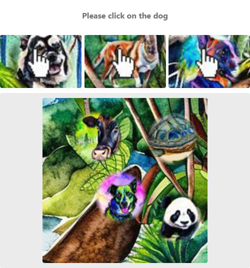

In [13]:
print(image.size)
display(image.resize((image.size[0]//2, image.size[1]//2)))

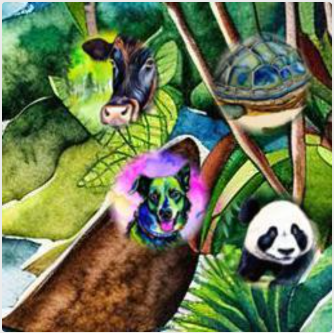

In [14]:
clickable = image.crop((83,194,image.size[0]-83,527))
display(clickable)

In [15]:
%run v2_handler.py
v2h = V2_Handler(db2)
pred = v2h.predict_image(image)
pred

x shape: (1, 4, 536, 500)
prediction: [-0.08957092 -0.07393637]
clickable area: (334, 333)
prediction: [-29.91668634 -24.62080973]


array([-29.91668634, -24.62080973])

In [16]:
click_correct_v2(wd, pred[0], pred[1])
time.sleep(2)
is_captcha_solved(wd)

Submitted captcha


True